In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.stats import t,f,normaltest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
df= pd.read_excel('/content/drive/MyDrive/NutritionStudy.xls')
df

,ID,Age,Smoke,Quetelet,Calories,Fat,Fiber,Alcohol,Cholesterol,BetaDiet,RetinolDiet,BetaPlasma,RetinolPlasma,Gender,VitaminUse,PriorSmoke
0,1,64,No,21.4838,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915,Female,Regular,2
1,2,76,No,23.8763,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727,Female,Regular,1
2,3,38,No,20.0108,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721,Female,Occasional,2
3,4,40,No,25.1406,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615,Female,No,2
4,5,72,No,20.9850,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799,Female,Regular,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,311,46,No,25.8967,2263.6,98.2,19.4,2.6,306.5,2572,1261,164,216,Female,No,2
311,312,45,No,23.8270,1841.1,84.2,14.1,2.2,257.7,1665,465,80,328,Female,Regular,1
312,313,49,No,24.2613,1125.6,44.8,11.9,4.0,150.5,6943,520,300,502,Female,Regular,1
313,314,31,No,23.4525,2729.6,144.4,13.2,2.2,381.8,741,644,121,684,Female,Regular,2


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             315 non-null    int64  
 1   Age            315 non-null    int64  
 2   Smoke          315 non-null    object 
 3   Quetelet       315 non-null    float64
 4   Calories       315 non-null    float64
 5   Fat            315 non-null    float64
 6   Fiber          315 non-null    float64
 7   Alcohol        315 non-null    float64
 8   Cholesterol    315 non-null    float64
 9   BetaDiet       315 non-null    int64  
 10  RetinolDiet    315 non-null    int64  
 11  BetaPlasma     315 non-null    int64  
 12  RetinolPlasma  315 non-null    int64  
 13  Gender         315 non-null    object 
 14  VitaminUse     315 non-null    object 
 15  PriorSmoke     315 non-null    int64  
dtypes: float64(6), int64(7), object(3)
memory usage: 39.5+ KB


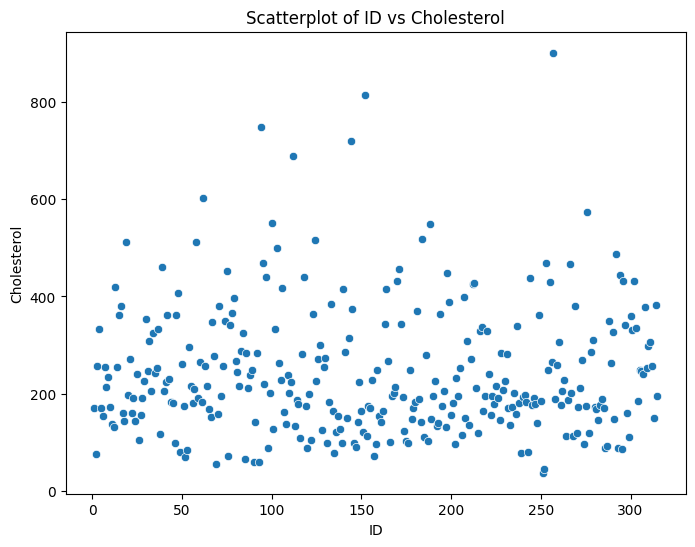

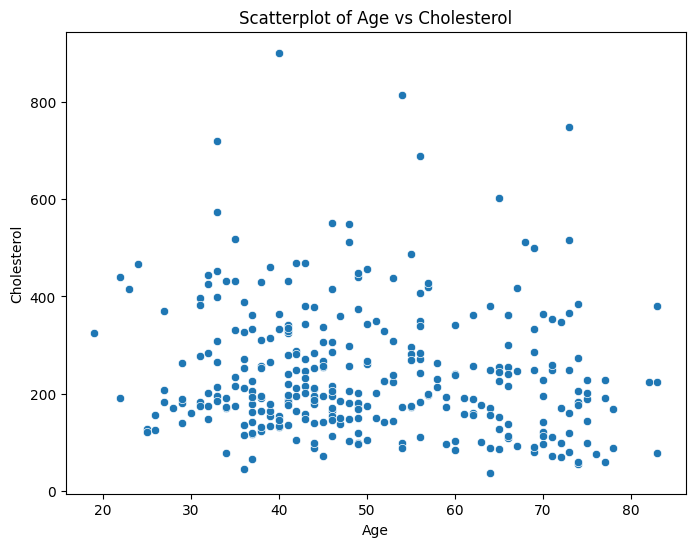

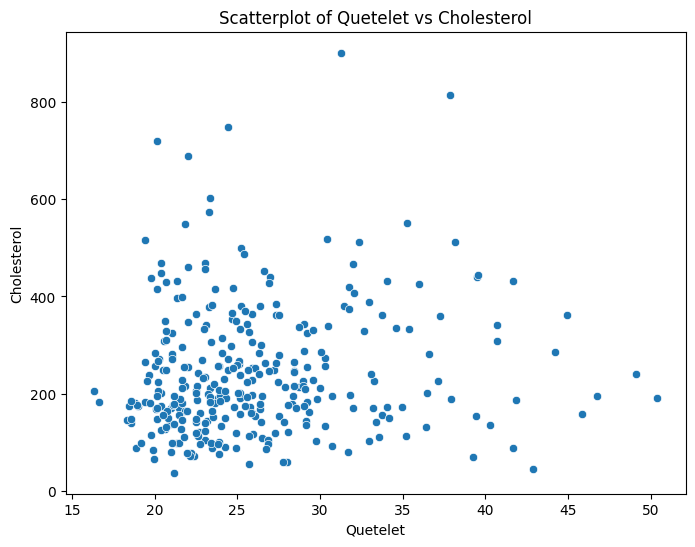

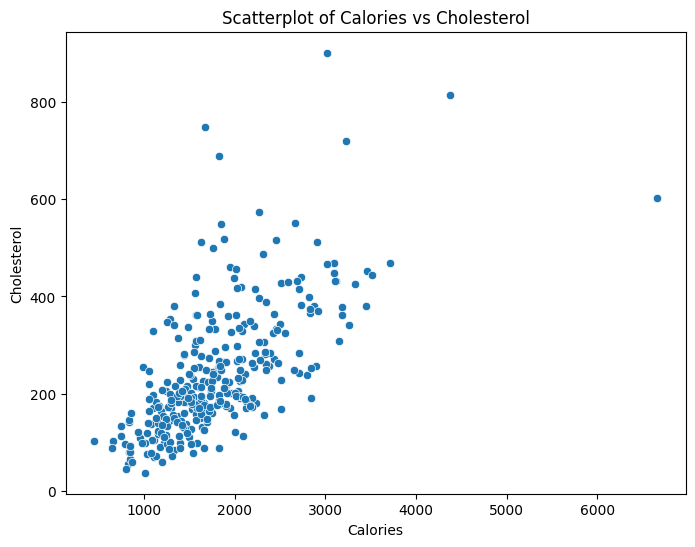

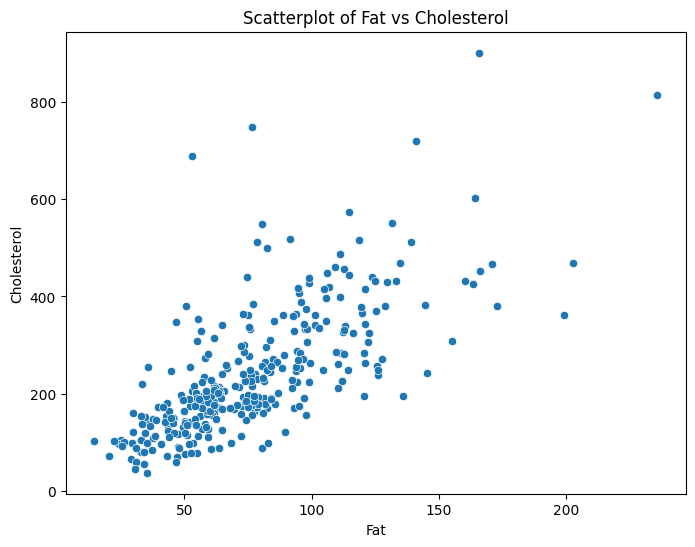

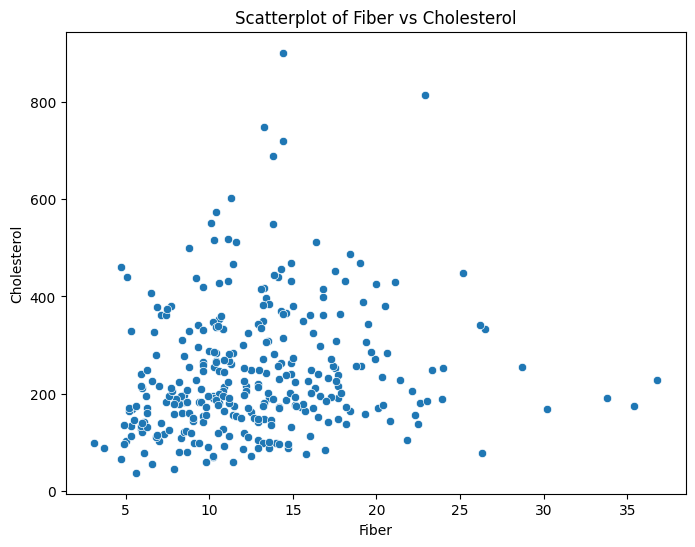

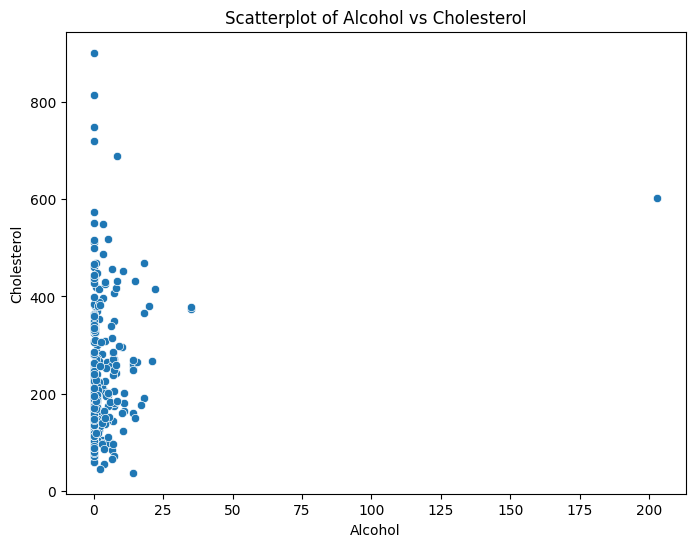

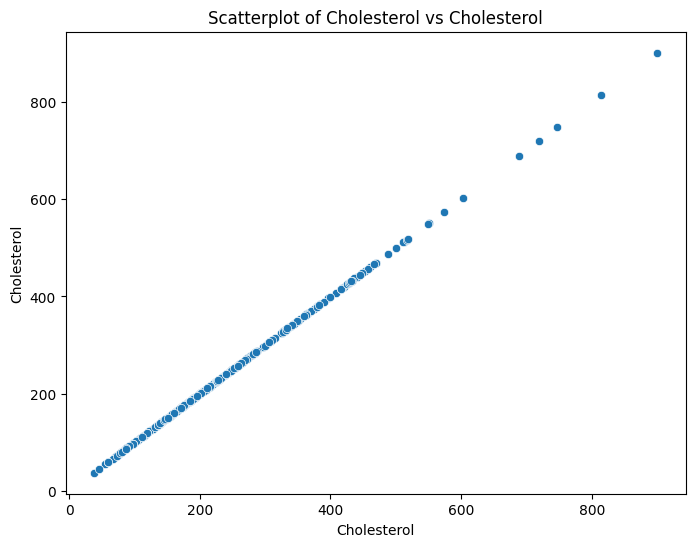

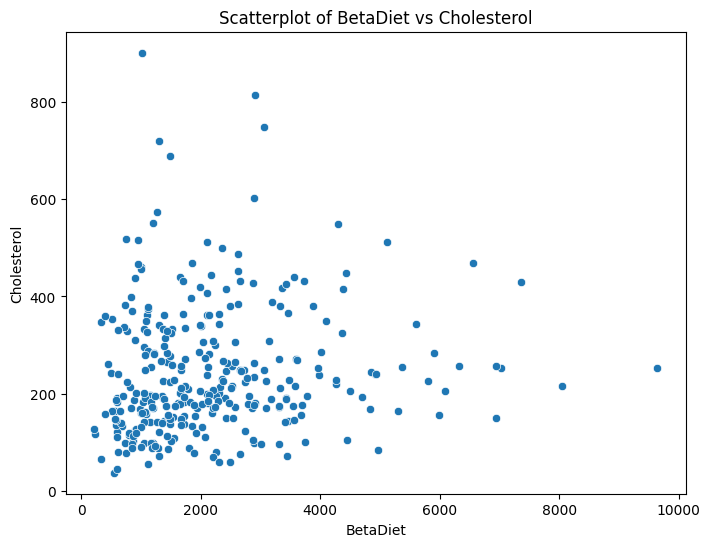

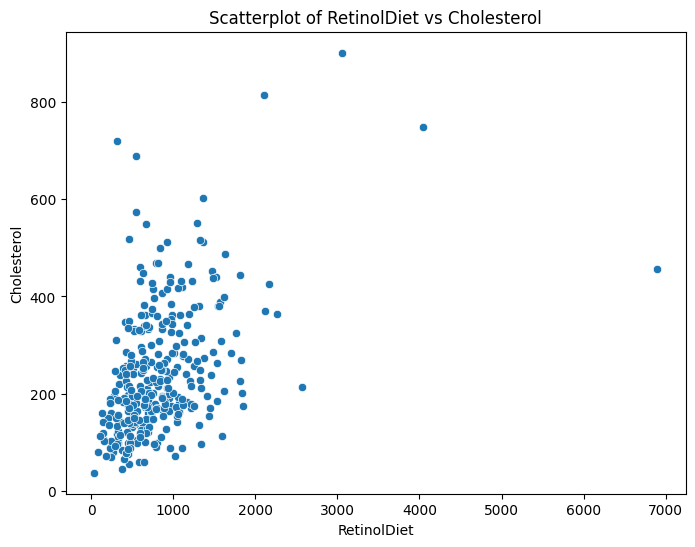

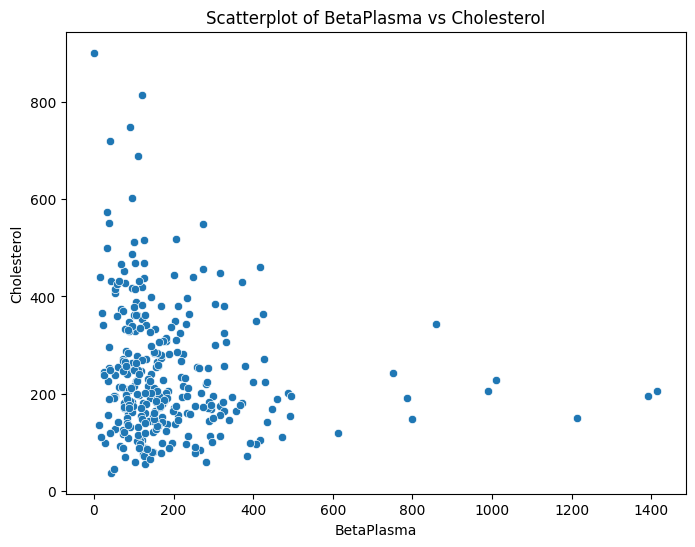

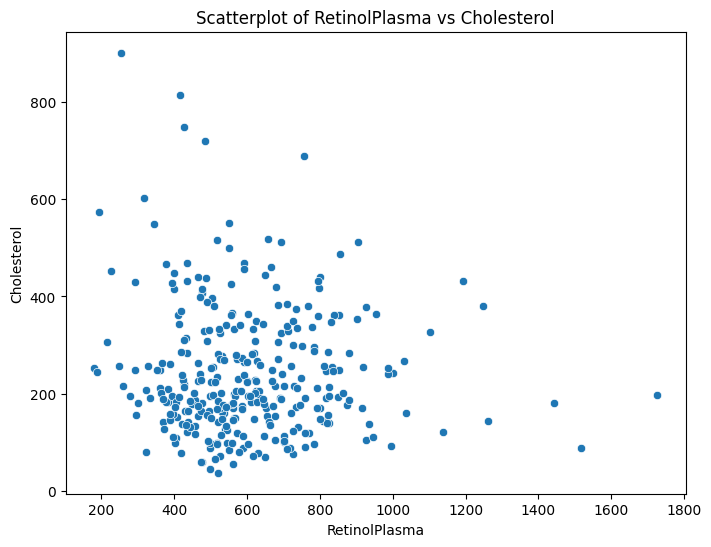

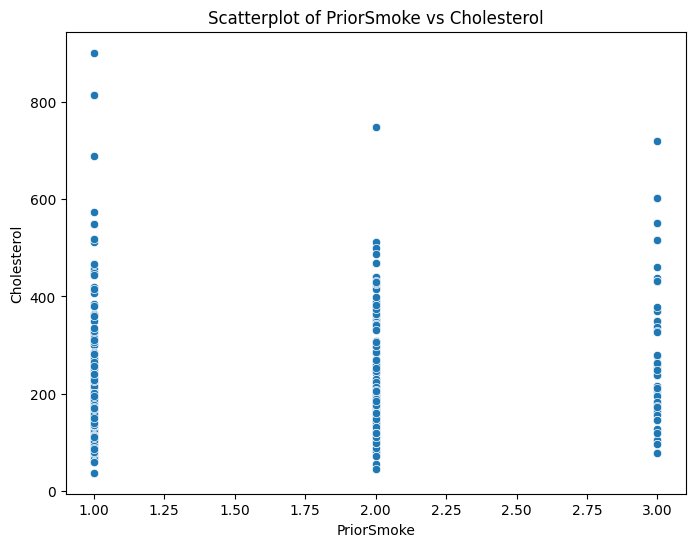

In [ ]:
# Assuming 'data' is your DataFrame containing all quantitative variables and the target variable 'cholesterol'
quantitative_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Iterate over each quantitative variable and plot its scatterplot with 'cholesterol'
for var in quantitative_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[var], y=df['Cholesterol'])
    plt.title(f'Scatterplot of {var} vs Cholesterol')
    plt.xlabel(var)
    plt.ylabel('Cholesterol')
    plt.grid(False)
    plt.show()

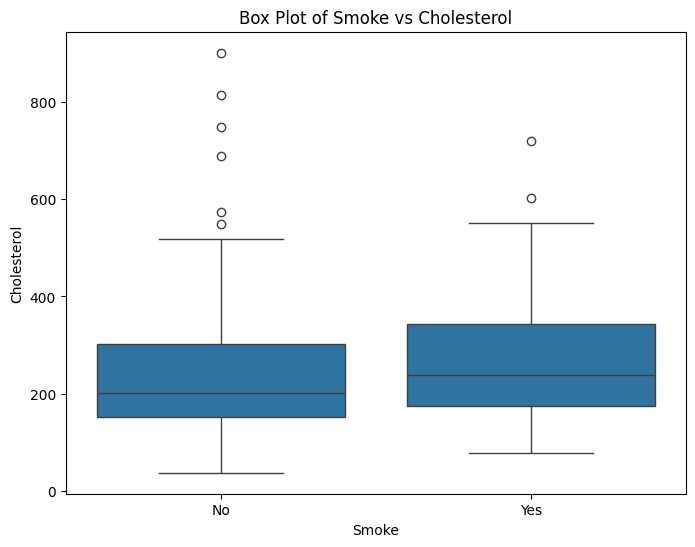

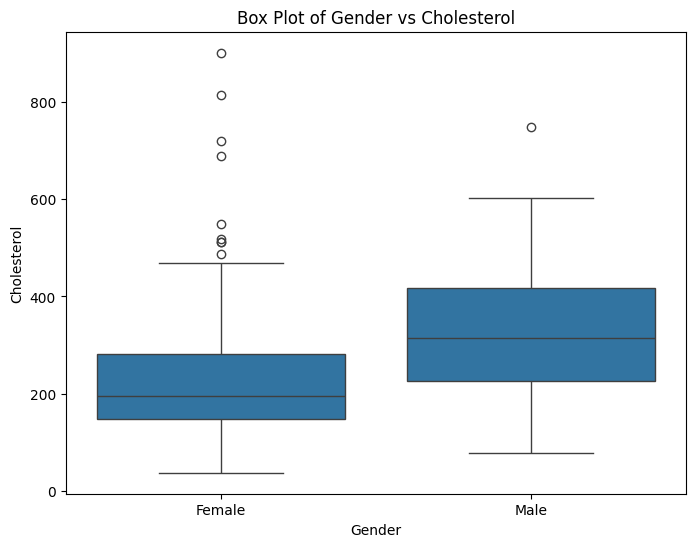

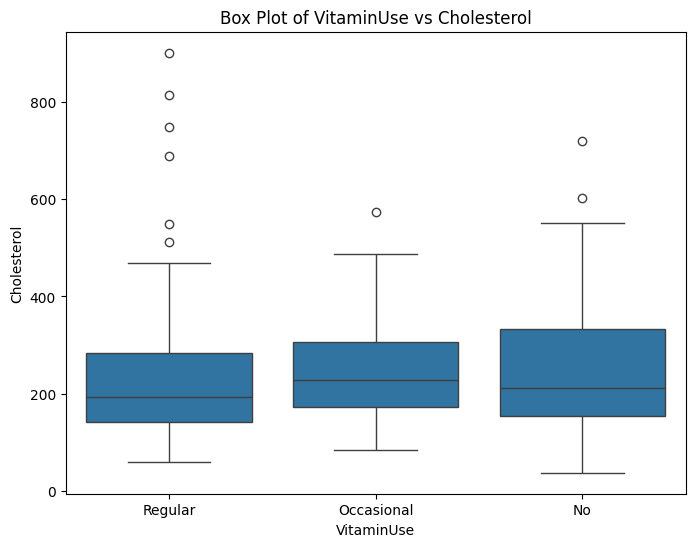

In [ ]:
# Assuming 'data' is your DataFrame containing all categorical variables and the target variable 'cholesterol'
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

# Iterate over each categorical variable and plot its box plot with 'cholesterol'
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[var], y=df['Cholesterol'])
    plt.title(f'Box Plot of {var} vs Cholesterol')
    plt.xlabel(var)
    plt.ylabel('Cholesterol')
    plt.grid(False)
    plt.show()


# Preparatory Work

In [ ]:
df.select_dtypes(include = ['object'])

,Smoke,Gender,VitaminUse
0,No,Female,Regular
1,No,Female,Regular
2,No,Female,Occasional
3,No,Female,No
4,No,Female,Regular
...,...,...,...
310,No,Female,No
311,No,Female,Regular
312,No,Female,Regular
313,No,Female,Regular


In [ ]:
df['PriorSmoke'].describe()

count    315.000000
mean       1.638095
std        0.711021
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: PriorSmoke, dtype: float64

In [ ]:
df['VitaminUse'].value_counts()

VitaminUse
Regular       122
No            111
Occasional     82
Name: count, dtype: int64

## a.For any dichotomous categorical variable (i.e. a categorical variable with 2 levels), you want to recode such a variable so that the values (or numbers) that indicate the level are set to 0 and 1.   The GENDER and SMOKE variables are like this.  Often, an analyst will just create a new variable, like d_GENDER, that is the coded version of GENDER.  

In [ ]:
data= df.copy()

In [ ]:
data['d_Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [ ]:
data['d_Smoke'] = data['Smoke'].map({'No':0,'Yes':1})


## For categorical variables with 3 or more levels, you will need to construct a set of dummy coded (0/1) variables to indicate the levels.  The VITAMINUSE and PRIORSMOKE variables are like this. Each level must have its own dummy coded variable.  As such, there should be 3 dummy coded variables for VITAMINUSE.  Similarly, there will be 3 dummy coded variables for PRIORSMOKE.

In [ ]:
# Get the list of categorical columns
# categorical_columns = data.select_dtypes(include=['object']).columns

# Convert categorical columns to dummy variables
dummy_variables = pd.get_dummies(data['VitaminUse'] , drop_first=False).astype(int)

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_variables], axis=1)

# Drop the original categorical columns
# data.drop(columns=categorical_columns, inplace=True)

In [ ]:
# Get the list of categorical columns
# categorical_columns = data.select_dtypes(include=['object']).columns

# Convert categorical columns to dummy variables
dummy_variables = pd.get_dummies(data['PriorSmoke'] , drop_first=False).astype(int)

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_variables], axis=1)

# Drop the original categorical columns
# data.drop(columns=categorical_columns, inplace=True)

In [ ]:
# Dictionary mapping old column names to new column names
new_column_names = {
    'No': 'd_No_Smoke',
    'Occasional': 'd_Occasional_Smoke',
    'Regular': 'd_Regular_Smoke',
   }

# Rename columns
data.rename(columns=new_column_names, inplace=True)

In [ ]:
# Dictionary mapping old column names to new column names
new_column_names = {
   1: 'd_1_PS',
    2: 'd_2_PS',
    3: 'd_3_PS'
}

# Rename columns
data.rename(columns=new_column_names, inplace=True)

## c.Some analysts like to take continuous variables and discretize or convert them into categorical.   For example, the ALCOHOL variable may be easier to work with or interpret results if it were converted into a variable called ALCOHOL CONSUMPTION with levels like:  None, Some, A lot.  In doing this, you could discretize the ALCOHOL variable to form a new categorical variable with 3 levels.  The levels are: </br>1    if ALCOHOL = 0</br>2    if 0 < ALCOHOL < 10</br>3    if ALCOHOL >= 10  </br>Once you have the levels for the new ALCOHOL CONSUMPTION categorical variable, you would then dummy code these levels.


In [ ]:
data['Alcohol'].describe()

count    315.000000
mean       3.279365
std       12.322880
min        0.000000
25%        0.000000
50%        0.300000
75%        3.200000
max      203.000000
Name: Alcohol, dtype: float64

In [ ]:
# Define conditions and choices
conditions = [
    (data['Alcohol'] == 0),
    (data['Alcohol'] > 0) & (data['Alcohol'] < 10),
    (data['Alcohol'] >= 10)
]

choices = ['None', 'Some', 'Alot']

# Apply np.select() to create the new categorical column
data['Alcohol_Category'] = np.select(conditions, choices)


In [ ]:
# Get the list of categorical columns
# categorical_columns = data.select_dtypes(include=['object']).columns

# Convert categorical columns to dummy variables
dummy_variables = pd.get_dummies(data['Alcohol_Category'] , drop_first=False).astype(int)

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_variables], axis=1)

# Drop the original categorical columns
# data.drop(columns=categorical_columns, inplace=True)

In [ ]:
# Dictionary mapping old column names to new column names
new_column_names = {
   'Alot': 'd_Alot_Alch',
    'None': 'd_None_Alch',
    'Some': 'd_Some_Alch'
}

# Rename columns
data.rename(columns=new_column_names, inplace=True)

In [ ]:
data

,ID,Age,Smoke,Quetelet,Calories,Fat,Fiber,Alcohol,Cholesterol,BetaDiet,...,d_No_Smoke,d_Occasional_Smoke,d_Regular_Smoke,d_1_PS,d_2_PS,d_3_PS,Alcohol_Category,d_Alot_Alch,d_None_Alch,d_Some_Alch
0,1,64,No,21.4838,1298.8,57.0,6.3,0.0,170.3,1945,...,0,0,1,0,1,0,None,0,1,0
1,2,76,No,23.8763,1032.5,50.1,15.8,0.0,75.8,2653,...,0,0,1,1,0,0,None,0,1,0
2,3,38,No,20.0108,2372.3,83.6,19.1,14.1,257.9,6321,...,0,1,0,0,1,0,Alot,1,0,0
3,4,40,No,25.1406,2449.5,97.5,26.5,0.5,332.6,1061,...,1,0,0,0,1,0,Some,0,0,1
4,5,72,No,20.9850,1952.1,82.6,16.2,0.0,170.8,2863,...,0,0,1,1,0,0,None,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,311,46,No,25.8967,2263.6,98.2,19.4,2.6,306.5,2572,...,1,0,0,0,1,0,Some,0,0,1
311,312,45,No,23.8270,1841.1,84.2,14.1,2.2,257.7,1665,...,0,0,1,1,0,0,Some,0,0,1
312,313,49,No,24.2613,1125.6,44.8,11.9,4.0,150.5,6943,...,0,0,1,1,0,0,Some,0,0,1
313,314,31,No,23.4525,2729.6,144.4,13.2,2.2,381.8,741,...,0,0,1,0,1,0,Some,0,0,1


In [ ]:
data1 = data.copy()

In [ ]:
columns_to_drop =['Smoke','Gender','VitaminUse','PriorSmoke','Alcohol']
# Assuming 'data' is your dataset and 'columns_to_drop' is a list of column names to be dropped
columns_to_keep = [col for col in data1.columns if col not in columns_to_drop]

# Create a new DataFrame with only the desired columns
data1 = data1[columns_to_keep]

# Task 1 : Obtain descriptive statistics (n, mean, s, and any others you want) for Y by the PRIORSMOKE variable.  Use the PRIORSMOKE variable as a factor in an ANOVA to test for mean differences in Cholesterol between PRIORSMOKE groups.   Report and interpret these results

In [ ]:
data[data['PriorSmoke'] == 1]['Cholesterol'].describe()

count    157.000000
mean     228.391083
std      134.228448
min       37.700000
25%      141.200000
50%      195.800000
75%      271.800000
max      900.700000
Name: Cholesterol, dtype: float64

In [ ]:
data[data['PriorSmoke'] == 2]['Cholesterol'].describe()

count    115.000000
mean     250.424348
std      121.691586
min       46.300000
25%      160.400000
50%      216.700000
75%      340.550000
max      747.500000
Name: Cholesterol, dtype: float64

In [ ]:
data[data['PriorSmoke'] == 3]['Cholesterol'].describe()

count     43.000000
mean     272.532558
std      145.919098
min       78.300000
25%      174.300000
50%      239.200000
75%      343.250000
max      718.800000
Name: Cholesterol, dtype: float64

In [ ]:
data['Cholesterol'].mean()

242.4606349206349

In [ ]:
(228.391083+250.424348+272.532558)/3

250.44932966666667

In [ ]:
a = (data['Cholesterol'] - np.mean(data['Cholesterol']))
b= a**2
SST = np.sum(b)
SST

5470440.851873016

In [ ]:
m = np.mean(data['Cholesterol']) -data[data['PriorSmoke'] == 1]['Cholesterol'].mean()
n=np.mean(data['Cholesterol'] )-data[data['PriorSmoke'] == 2]['Cholesterol'].mean()
o = np.mean(data['Cholesterol'] )-data[data['PriorSmoke'] == 3]['Cholesterol'].mean()
SSB = m**2  +  n**2  + o**2
SSB



1165.693586127451

In [ ]:
SSW = SST - SSB
SSW

5469275.158286888

In [ ]:
MSB = SSB/2    # Total df = n-1  , df for between = number of groups -1 ,   df for within = n - number of groups
MSW = SSW/312

In [ ]:
F = MSB/MSW
F

0.03324904931147068

In [ ]:
F_critical = 3.041

In [ ]:
if F >  F_critical:
    print("Reject the null hypothesis (H0)")
    print("There is sufficient evidence to conclude that there is a significant difference between the group means.")
else:
    print("Fail to reject the null hypothesis (H0)")
    print("There is not enough evidence to conclude that there is a significant difference between the group means.")

Fail to reject the null hypothesis (H0)
There is not enough evidence to conclude that there is a significant difference between the group means.


# Task2. Fit a linear regression model that uses the dummy coded variables for PRIORSMOKE to predict Cholesterol (Y).   Call this Model 1.   Remember:  you need to leave one of the dummy coded variables out of the equation.  That category becomes the “basis of interpretation.”  Report the prediction equation and interpret each coefficient in the context of this problem.  Report the coefficient and ANOVA tables from this regression model.   Discuss how the results from the regression model compare and contrast to the results from the ANOVA model in Task 1.


In [ ]:
data.columns

Index(['ID', 'Age', 'Smoke', 'Quetelet', 'Calories', 'Fat', 'Fiber', 'Alcohol',
       'Cholesterol', 'BetaDiet', 'RetinolDiet', 'BetaPlasma', 'RetinolPlasma',
       'Gender', 'VitaminUse', 'PriorSmoke', 'd_Gender', 'd_Smoke',
       'd_No_Smoke', 'd_Occasional_Smoke', 'd_Regular_Smoke', 'd_1_PS',
       'd_2_PS', 'd_3_PS', 'Alcohol_Category', 'd_Alot_Alch', 'd_None_Alch',
       'd_Some_Alch'],
      dtype='object')

In [ ]:
# Assuming 'target_column' is the column you want to predict, and 'feature_columns' are the predictor variables
X = data[['d_1_PS','d_2_PS']]  # Add all your predictor variables here
Y= data['Cholesterol']

# Fit the multiple linear regression model
model1 = sm.OLS(Y, sm.add_constant(X)).fit()

# Get predictions
# predictions = model.predict(X)

# Get the summary of the regression model
print(model1.summary())



# Print the regression equation
print("Regression Equation:")
print("Cholesterol = {:.4f} + {:.4f}*d_1_PS+ {:.4f}*d_2_PS".format(model1.params['const'], model1.params['d_1_PS'],model1.params['d_2_PS']))


                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.235
Date:                Tue, 07 May 2024   Prob (F-statistic):              0.109
Time:                        08:55:55   Log-Likelihood:                -1982.3
No. Observations:                 315   AIC:                             3971.
Df Residuals:                     312   BIC:                             3982.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        272.5326     20.050     13.593      0.0

In [ ]:
# Fit the multiple linear regression model
model2= ols('Y ~ X', data=data).fit()

sm.stats.anova_lm(model2,type =2)
# Print the ANOVA table

,df,sum_sq,mean_sq,F,PR(>F)
X,2.0,7.725768e+04,38628.839056,2.23471,0.108734
Residual,312.0,5.393183e+06,17285.843506,NaN,NaN


In [ ]:
# Fit the multiple linear regression model
model3= ols('Cholesterol ~ d_1_PS + d_2_PS ', data=data).fit()

sm.stats.anova_lm(model3,type =3)
# Print the ANOVA table

,df,sum_sq,mean_sq,F,PR(>F)
d_1_PS,1.0,6.196032e+04,61960.321762,3.584455,0.059248
d_2_PS,1.0,1.529736e+04,15297.356350,0.884964,0.347573
Residual,312.0,5.393183e+06,17285.843506,NaN,NaN


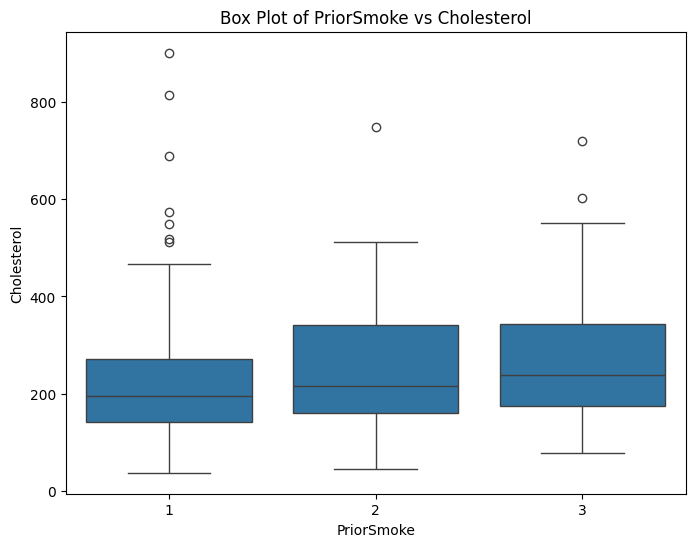

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['PriorSmoke'], y=data['Cholesterol'])
plt.title(f'Box Plot of PriorSmoke vs Cholesterol')
plt.xlabel('PriorSmoke')
plt.ylabel('Cholesterol')
plt.grid(False)
plt.show()

# Task3.Model 1 illustrates the ANOVA model as a Linear Regression Model.  Let’s go a step further.   Start with Model 1 and add in the continuous variable FAT.  In other words, you are using FAT and PRIORSMOKE to predict Cholesterol, but you are using dummy coded variables for the PRIORSMOKE categorical variable.  More specifically, fit a multiple linear model that uses the FAT continuous variable and the PRIORSMOKE dummy coded variables to predict the response variable CHOLESTEROL (Y).   Remember to leave one of the dummy coded variables out of the model so that you have a basis of interpretation for the constant term.  Report the prediction model, interpret the coefficients, discuss hypothesis test results, goodness of fit statistics, diagnostic graphs, and leverage, influence and Outlier statistics, if it is relevant.  This is called an Analysis of Covariance Model (ANCOVA).  Call this Model 2.

In [ ]:
# Assuming 'target_column' is the column you want to predict, and 'feature_columns' are the predictor variables
X = data[['Fat']]  # Add all your predictor variables here
Y= data['Cholesterol']

# Fit the multiple linear regression model
model4 = sm.OLS(Y, sm.add_constant(X)).fit()

# Get predictions
# predictions = model.predict(X)

# Get the summary of the regression model
print(model4.summary())



# Print the regression equation
print("Regression Equation:")
# print("Cholesterol = {:.4f}+ {:.4f}*Fat + {:.4f}*d_1_PS+ {:.4f}*d_2_PS".format(model4.params['const'], model4.params['Fat'], model4.params['d_1_PS'],model4.params['d_2_PS']))


                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     317.9
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.45e-49
Time:                        08:55:55   Log-Likelihood:                -1874.1
No. Observations:                 315   AIC:                             3752.
Df Residuals:                     313   BIC:                             3760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.1092     13.066      2.228      0.0

In [ ]:
# Assuming 'target_column' is the column you want to predict, and 'feature_columns' are the predictor variables
X = data[['Fat','d_1_PS','d_2_PS']]  # Add all your predictor variables here
Y= data['Cholesterol']

# Fit the multiple linear regression model
model4 = sm.OLS(Y, sm.add_constant(X)).fit()

# Get predictions
# predictions = model.predict(X)

# Get the summary of the regression model
print(model4.summary())



# Print the regression equation
print("Regression Equation:")
print("Cholesterol = {:.4f}+ {:.4f}*Fat + {:.4f}*d_1_PS+ {:.4f}*d_2_PS".format(model4.params['const'], model4.params['Fat'], model4.params['d_1_PS'],model4.params['d_2_PS']))


                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     105.7
Date:                Tue, 07 May 2024   Prob (F-statistic):           3.43e-47
Time:                        08:55:55   Log-Likelihood:                -1873.8
No. Observations:                 315   AIC:                             3756.
Df Residuals:                     311   BIC:                             3771.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.5759     19.459      2.034      0.0

In [ ]:
# Coefficients from the provided regression equation
b0 = 39.5759
b1 = 2.7630
b2 = -10.6358
b3 = -12.7500

# Extract the required features from the dataset
Fat = data['Fat']
d_1_PS = data['d_1_PS']
d_2_PS = data['d_2_PS']

# Calculate the predicted values using the regression equation
predicted_values = b0 + b1 * Fat + b2 * d_1_PS + b3 * d_2_PS

# Extract the actual values
actual_values = data['Cholesterol']

# Calculate the residuals
residuals = actual_values - predicted_values
res_square = residuals ** 2
sum_res_square = np.sum(res_square)
MSE = sum_res_square / 311
RMSE = np.sqrt(MSE)

# Create a DataFrame to hold actual, predicted, and residual values
results = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values, 'Residual': residuals, 'Res_Sqr': res_square})
print(RMSE)
# Print the actual, predicted, and residual values
# print(results)


93.3264487012174


In [ ]:
results['Std_res'] = results['Residual']/RMSE

In [ ]:
b= results['Predicted'].index
a = data[data['PriorSmoke'] == 1].index
# Find the intersection of the two sets
matching_indexes = b.intersection(a)      #Find the common indexes to find the predicted values of cholesterol for priorsmoke = 1
matching_indexes_list = list(matching_indexes)
print(matching_indexes_list)

[1, 4, 6, 7, 8, 11, 12, 13, 14, 18, 22, 24, 25, 27, 28, 33, 39, 40, 44, 45, 46, 47, 50, 51, 52, 54, 55, 58, 59, 60, 62, 65, 69, 70, 74, 79, 80, 83, 84, 89, 90, 92, 95, 103, 104, 111, 112, 113, 115, 116, 119, 120, 124, 125, 126, 127, 129, 130, 132, 134, 135, 137, 140, 141, 142, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 163, 165, 167, 170, 178, 181, 182, 183, 186, 187, 189, 190, 191, 192, 193, 195, 197, 199, 202, 203, 204, 205, 208, 209, 210, 213, 215, 217, 218, 220, 222, 223, 224, 225, 227, 229, 230, 231, 232, 234, 235, 239, 241, 242, 244, 246, 247, 248, 249, 250, 255, 256, 257, 259, 260, 262, 263, 265, 266, 267, 268, 270, 275, 278, 280, 284, 285, 286, 287, 292, 293, 294, 298, 299, 302, 306, 311, 312, 314]


In [ ]:
# Filter the index values from results['Predicted']
filtered_results = results['Predicted'].iloc[matching_indexes_list]

# Print the filtered results
filtered_results.mean()

228.3935025477707

In [ ]:
data[data['PriorSmoke'] ==1]['Cholesterol'].mean()

228.39108280254774

If the covariate does not influence the relationship between the categorical variable and the dependent variable, and the primary interest is in assessing the effect of the categorical variable on the dependent variable, having similar adjusted means compared to original means can be considered good. It suggests that the categorical variable has a substantial and independent effect on the dependent variable, unaffected by the covariate.

Histogram of Standardizedd residuals

In [ ]:
import scipy.stats as stats

# Assuming 'results' is your DataFrame and 'column' is the column for which you want to create a histogram
dat = results['Std_res']

# Fit a distribution to the data
mu, std = stats.norm.fit(dat)  # Fit a normal distribution
xmin, xmax = min(dat), max(dat)
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # Probability density function for the fitted normal distribution

# Create a histogram
fig = go.Figure(data=[go.Histogram(x=dat, histnorm='probability density')])

# Add a line for the fitted distribution
fig.add_trace(go.Scatter(x=x, y=p, mode='lines', name='Fitted Normal Distribution'))

# Update layout
fig.update_layout(
    title="Histogram of Standard Residuals with Fitted Normal Distribution",
    xaxis_title="Standard Residuals",
    yaxis_title="Density",
    bargap=0.1
)

# Show the plot
fig.show()

Scatterplot of Std_res vs fitted values

In [ ]:
# Assuming 'results' is your DataFrame containing the data
x_data = results['Predicted']  # Replace 'x_column' with the name of your x-axis column
y_data = results['Std_res']  # Replace 'y_column' with the name of your y-axis column

# Calculate the mean of y_data
mean_y = y_data.mean()

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=x_data, y=y_data, mode='markers'))

# Add a horizontal line at the mean of y_data
fig.add_shape(
    type="line",
    x0=x_data.min(),
    y0=mean_y,
    x1=x_data.max(),
    y1=mean_y,
    line=dict(
        color="red",
        width=3,
        dash="dashdot",
    ),
)

# Update layout
fig.update_layout(
    title="Scatter Plot of Predicted vs Std_res with Mean Line",
    xaxis_title="Predicted",
    yaxis_title="Std_res"
)

# Show the plot
fig.show()

leverage point calculation

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
# Assuming 'target_column' is the column you want to predict, and 'feature_columns' are the predictor variables
# X = data1[['Fat','d_1_PS','d_2_PS']]  # Add all your predictor variables here
# Y= data1['Cholesterol']
# Fit your regression model
model5 = sm.OLS(Y, X).fit()

# Get influence object
influence = OLSInfluence(model5)

# Obtain leverage values
leverage = influence.hat_matrix_diag

# Print leverage values
print("Leverage values:", leverage)
# leverage_value = leverage[1114]
# print("Leverage value:", '{:.10f}'.format(leverage_value))

Leverage values: [0.00956661 0.0071116  0.00870652 0.00911351 0.00653438 0.00964093
 0.00698941 0.0064869  0.00668433 0.01129395 0.00949533 0.00716634
 0.00818152 0.00840591 0.00638146 0.01218227 0.00869573 0.01190456
 0.00643199 0.01029534 0.01200967 0.00926981 0.00649028 0.01014137
 0.006414   0.00872954 0.00931193 0.00658896 0.00875664 0.00968699
 0.00895169 0.01704288 0.00428954 0.01025114 0.01499985 0.01381681
 0.0087341  0.01038537 0.01810804 0.00643345 0.00672496 0.02990481
 0.0087032  0.00487366 0.00661431 0.00691213 0.00679436 0.0071751
 0.01221935 0.01854215 0.0063702  0.00731929 0.00824235 0.00869812
 0.00653357 0.006414   0.00607654 0.01384397 0.00729853 0.00650422
 0.00671114 0.04106739 0.01074221 0.00872283 0.0088943  0.00851876
 0.01046746 0.00860315 0.01200312 0.00664617 0.00707838 0.01106606
 0.00869625 0.0110693  0.01975835 0.01426904 0.00932091 0.01100639
 0.00961428 0.00663905 0.00656758 0.00441977 0.00895965 0.00930304
 0.00918069 0.00901432 0.00999929 0.02411423 0

Std_res vs Leverage

In [ ]:
# Assuming 'leverage_values' and 'standardized_residuals' are arrays containing the respective values

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=leverage, y=results['Std_res'], mode='markers'))

# Update layout
fig.update_layout(
    title='Scatter Plot of Leverage vs Standardized Residuals',
    xaxis_title='Leverage',
    yaxis_title='Standardized Residuals'
)

# Show the plot
fig.show()

ANCOVA

In [ ]:
model6 = sm.OLS.from_formula('Cholesterol~ d_1_PS + d_2_PS + Fat', data=data).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     105.7
Date:                Tue, 07 May 2024   Prob (F-statistic):           3.43e-47
Time:                        08:55:56   Log-Likelihood:                -1873.8
No. Observations:                 315   AIC:                             3756.
Df Residuals:                     311   BIC:                             3771.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.5759     19.459      2.034      0.0

Cooks Distance

In [ ]:
np.set_printoptions(suppress=True)

#create instance of influence
influence = model5.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

# #display Cook's distances
# cooks

cooks_df= pd.DataFrame({'Cooks_Distance': cooks[0], 'P-Value': cooks[1]})
cooks_df

,Cooks_Distance,P-Value
0,2.856392e-05,1.000000
1,2.056670e-03,0.999871
2,8.171322e-08,1.000000
3,3.776096e-04,0.999990
4,1.970720e-03,0.999879
...,...,...
310,7.408201e-06,1.000000
311,1.070172e-05,1.000000
312,4.078224e-06,1.000000
313,1.937067e-03,0.999882


In [ ]:
 #Create a histogram of Cook's distance
fig = go.Figure(data=[go.Histogram(x=cooks_df['Cooks_Distance'])])

# Update layout
fig.update_layout(
    title="Histogram of Cook's Distance",
    xaxis_title="Cook's Distance",
    yaxis_title="Frequency"
)

# Show the plot
fig.show()

In [ ]:
4*(np.mean(cooks_df['Cooks_Distance']))

0.01571069085685709

for ANCOVA we check the difference between the groups based on the covariate, means we check the difference in priorsmoke levels by controlling the effect of Fat. </br>
we adjust our means , for the equal value of covariate for all.
</br>In one way ANOVA we are studying the differences in levels of PriorSmoke(1=Never, 2= Former, 3= Current), based to their cholesterol.
</br> In simple one way most of the sum of squares is error.</br> By adding covariate Fat our overall significance of model increases(F- Value) and eated the most of the error , also increased the r-squared. </br>

Sure! Imagine you're trying to figure out if a new teaching method improves students' test scores. But you know that students come into the class with different abilities, like how good they were at math before the new method. ANCOVA is like putting all the students on a level playing field. It helps you see if the new teaching method really makes a difference, without being influenced too much by how good students were to begin with. So, ANCOVA helps us see the true impact of something, while accounting for other factors that might also affect the outcome.

# Task 4.Use the ANCOVA Model 2 from Task 3) to obtain predicted values for CHOLESTEROL(Y).   Now, make a scatterplot of the Predicted Values for Y (y-axis) by FAT (X), but color code the records for the different groups of PRIORSMOKE.  What do you notice about the patterns in the predicted values of Y?   Make a second scatterplot of the actual values of CHOLESTEROL(Y) by FAT (X), but color code the data points by the different groups of the PRIORSMOKE variable.  If you compare the two scatterplots, does the ANCOVA model appear to fit the observed data very well?   Or, is a more complex model needed?


In [ ]:
# Create scatter plot with color-coded points for PRIORSMOKE groups
fig = px.scatter(data, x=data['Fat'], y=results['Predicted'], color='PriorSmoke',
                 color_discrete_map={1: 'blue', 2: 'green', 3: 'red'},
                 title='Scatterplot of Predicted Values for Y by FAT (Color-coded by PRIORSMOKE)',
                 labels={'FAT': 'FAT', 'Predicted Values': 'Predicted Values for Y', 'PriorSmoke': 'PriorSmoke'})

# Show the plot
fig.show()

In [ ]:
# Create scatter plot with color-coded points for PRIORSMOKE groups
fig = px.scatter(data, x=data['Fat'], y=results['Actual'], color='PriorSmoke',
                 color_discrete_map={1: 'blue', 2: 'green', 3: 'red'},
                 title='Scatterplot of Actual values for Y by FAT (Color-coded by PRIORSMOKE)',
                 labels={'FAT': 'FAT', 'Actual Values': 'Actual Values for Y', 'PriorSmoke': 'PriorSmoke'})

# Show the plot
fig.show()

In [ ]:
# Create scatter plot with color-coded points for PRIORSMOKE groups
fig = px.scatter(data, x=results['Actual'], y=results['Predicted'], color='PriorSmoke',
                 color_discrete_map={1: 'blue', 2: 'green', 3: 'red'},
                 title='Scatterplot of Actual Values for Y by Predicted Values (Color-coded by PRIORSMOKE)',
                 labels={'FAT': 'FAT', 'Actual Values': 'Predicted Values for Y', 'PriorSmoke': 'PriorSmoke'})

# Show the plot
fig.show()

# Task5. Create new product variables by multiplying each of the dummy coded variables for PRIORSMOKE by the continuous FAT(X) variable.  Name and save these product variables to your dataset.   Now, to build the Unequal Slopes Model, start with the ANCOVA model, Model 2, from Task 3).  Add in the interaction variables you just created.  You now should have a multiple regression model with the predictor variables of:   FAT, two dummy coded PRIORSMOKE variables, and two product variables.   This is called an Unequal Slopes Model – call it Model 3.   Fit Model 3 and report the prediction equation, interpret the coefficients, discuss hypothesis test results, goodness of fit statistics, diagnostic graphs, leverage, influence, and Outlier statistics, if warranted.

In [ ]:
data['d_1_PS_x_Fat'] = data['d_1_PS']*data['Fat']

In [ ]:
data['d_2_PS_x_Fat'] = data['d_2_PS']*data['Fat']

In [ ]:
# Assuming 'target_column' is the column you want to predict, and 'feature_columns' are the predictor variables
X = data[['Fat','d_1_PS','d_2_PS','d_2_PS_x_Fat','d_1_PS_x_Fat']]  # Add all your predictor variables here
Y= data['Cholesterol']

# Fit the multiple linear regression model
model6= sm.OLS(Y, sm.add_constant(X)).fit()

# Get predictions
# predictions = model.predict(X)

# Get the summary of the regression model
print(model6.summary())



# Print the regression equation
print("Regression Equation:")
print("Cholesterol = {:.4f}+ {:.4f}*Fat + {:.4f}*d_1_PS+ {:.4f}*d_2_PS+ {:.4f}*d_2_PS_x_Fat+ {:.4f}*d_1_PS_x_Fat".format(model6.params['const'], model6.params['Fat'], model6.params['d_1_PS'],model6.params['d_2_PS'],model6.params['d_2_PS_x_Fat'],model6.params['d_1_PS_x_Fat']))


                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     65.97
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.01e-46
Time:                        08:55:57   Log-Likelihood:                -1870.1
No. Observations:                 315   AIC:                             3752.
Df Residuals:                     309   BIC:                             3775.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.1791     38.038     -0.504   

In [ ]:
# Assuming 'target_column' is the column you want to predict, and 'feature_columns' are the predictor variables
X = data[['d_2_PS_x_Fat','d_1_PS_x_Fat']]  # Add all your predictor variables here
Y= data['Cholesterol']

# Fit the multiple linear regression model
model6= sm.OLS(Y, sm.add_constant(X)).fit()

# Get predictions
# predictions = model.predict(X)

# Get the summary of the regression model
print(model6.summary())



# Print the regression equation
print("Regression Equation:")
# print("Cholesterol = {:.4f}+ {:.4f}*Fat + {:.4f}*d_1_PS+ {:.4f}*d_2_PS+ {:.4f}*d_2_PS_x_Fat+ {:.4f}*d_1_PS_x_Fat".format(model6.params['const'], model6.params['Fat'], model6.params['d_1_PS'],model6.params['d_2_PS'],model6.params['d_2_PS_x_Fat'],model6.params['d_1_PS_x_Fat']))


                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     34.33
Date:                Tue, 07 May 2024   Prob (F-statistic):           3.34e-14
Time:                        09:28:45   Log-Likelihood:                -1953.2
No. Observations:                 315   AIC:                             3912.
Df Residuals:                     312   BIC:                             3924.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          152.4675     12.852     11.864   

In [ ]:
# Coefficients from the provided regression equation
b0 = 152.4675
b1 = 1.3829
b2 = 1.3657


# Extract the required features from the dataset
# Fat = data['Fat']
d_2_PS_x_Fat = data['d_2_PS_x_Fat']
d_1_PS_x_Fat  = data['d_1_PS_x_Fat']

# Calculate the predicted values using the regression equation
predicted_values = b0 + b1 * d_2_PS_x_Fat + b2 * d_1_PS_x_Fat

# Extract the actual values
actual_values = data['Cholesterol']

# Calculate the residuals
residuals = actual_values - predicted_values
res_square = residuals ** 2
sum_res_square = np.sum(res_square)
MSE = sum_res_square / 312
RMSE = np.sqrt(MSE)

# Create a DataFrame to hold actual, predicted, and residual values
results1 = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values, 'Residual': residuals, 'Res_Sqr': res_square})
print(RMSE)
# Print the actual, predicted, and residual values
# print(results)


119.8786848310425


In [ ]:
# Create scatter plot with color-coded points for PRIORSMOKE groups
fig = px.scatter(data, x=data['Fat'], y=results1['Predicted'], color='PriorSmoke',
                 color_discrete_map={1: 'blue', 2: 'green', 3: 'red'},
                 title='Scatterplot of Predicted Values for Y by FAT (Color-coded by PRIORSMOKE)',
                 labels={'FAT': 'FAT', 'Predicted Values': 'Predicted Values for Y', 'PriorSmoke': 'PriorSmoke'})

# Show the plot
fig.show()

 **PS=2(Former) and Fat shows combined effect on the Cholesterol** </br>
 **Goodness of fit of the overall model decreases as the F- value decreases**</br>
 We have to check the coefficients of the interaction terms , that how they both(Combined) shows the effects on cholesterol.</br>
 By unequal slopes ,we want to put on a test that for fat variable , cholesterol differs for the different levels of the priorSmoke

In [ ]:
# Coefficients from the new regression equation
b0_new = -19.1791
b1_new = 3.4598
b2_new = 32.8823
b3_new = 84.2709
b4_new = -1.1697
b5_new = -0.4858

# Extract the required features from the dataset
Fat = data['Fat']
d_1_PS = data['d_1_PS']
d_2_PS = data['d_2_PS']
d_2_PS_x_Fat = data['d_2_PS_x_Fat']
d_1_PS_x_Fat  = data['d_1_PS_x_Fat']

# Calculate the predicted values using the new regression equation
predicted_values_new = b0_new + b1_new * Fat + b2_new * d_1_PS + b3_new * d_2_PS + b4_new * d_2_PS_x_Fat + b5_new *d_1_PS_x_Fat

# Extract the actual values
actual_values_new = data['Cholesterol']

# Calculate the residuals
residuals_new = actual_values_new - predicted_values_new
res_square_new = residuals_new ** 2
sum_res_square_new = np.sum(res_square_new)
MSE_new = sum_res_square_new / 309
RMSE_new = np.sqrt(MSE_new)

# Create a DataFrame to hold actual, predicted, and residual values
results_new = pd.DataFrame({'Actual': actual_values_new, 'Predicted': predicted_values_new, 'Residual': residuals_new, 'Res_Sqr': res_square_new})
print(RMSE_new)
# Print the actual, predicted, and residual values
# print(results_new)

92.53599048866526


Histogram of Residuals

In [ ]:
results_new['Std_res'] = results_new['Residual']/RMSE_new

In [ ]:
import scipy.stats as stats

# Assuming 'results' is your DataFrame and 'column' is the column for which you want to create a histogram
dat = results_new['Std_res']

# Fit a distribution to the data
mu, std = stats.norm.fit(dat)  # Fit a normal distribution
xmin, xmax = min(dat), max(dat)
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # Probability density function for the fitted normal distribution

# Create a histogram
fig = go.Figure(data=[go.Histogram(x=dat, histnorm='probability density')])

# Add a line for the fitted distribution
fig.add_trace(go.Scatter(x=x, y=p, mode='lines', name='Fitted Normal Distribution'))

# Update layout
fig.update_layout(
    title="Histogram of Standard Residuals with Fitted Normal Distribution",
    xaxis_title="Standard Residuals",
    yaxis_title="Density",
    bargap=0.1
)

# Show the plot
fig.show()

In [ ]:
# Assuming 'results' is your DataFrame containing the data
x_data = results_new['Predicted']  # Replace 'x_column' with the name of your x-axis column
y_data = results_new['Std_res']  # Replace 'y_column' with the name of your y-axis column

# Calculate the mean of y_data
mean_y = y_data.mean()

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=x_data, y=y_data, mode='markers'))

# Add a horizontal line at the mean of y_data
fig.add_shape(
    type="line",
    x0=x_data.min(),
    y0=mean_y,
    x1=x_data.max(),
    y1=mean_y,
    line=dict(
        color="red",
        width=3,
        dash="dashdot",
    ),
)

# Update layout
fig.update_layout(
    title="Scatter Plot of Predicted vs Std_res with Mean Line",
    xaxis_title="Predicted",
    yaxis_title="Std_res"
)

# Show the plot
fig.show()

# Task6. Use Model 3 to obtain predicted values.   Plot the predicted values for CHOLESTEROL (Y) by FAT(X).  Discuss what you see in this graph.

In [ ]:
# Create scatter plot with color-coded points for PRIORSMOKE groups
fig = px.scatter(data, x=data['Fat'], y=results_new['Predicted'], color='PriorSmoke',
                 color_discrete_map={1: 'blue', 2: 'green', 3: 'red'},
                 title='Scatterplot of Predicted Values for Y by FAT (Color-coded by PRIORSMOKE)',
                 labels={'FAT': 'FAT', 'Predicted Values': 'Predicted Values for Y', 'PriorSmoke': 'PriorSmoke'})

# Show the plot
fig.show()

**Unequal Slopes:Unequal slopes often indicate the presence of interaction effects between variables. Interaction effects occur when the effect of one independent variable on the dependent variable differs depending on the level or category of another independent variable.**</br>
**To check the significant interaction we go to the interaction term coefficients in the model.**


#Task 7.You should be aware that Model 2 and Model 3 are nested.  Which model is the full and which one is the reduced model?   Write out the null and alternative hypotheses for the nested F-test to determine if the slopes are unequal.  Use the ANOVA tables from Models 2 and 3 you fit previously to compute the F-statistic for a nested F-test using Full and Reduced models.  Conduct and interpret the nested hypothesis test.  Are there unequal slopes in this situation?   Discuss the findings.

In [ ]:
def Nested_Model_test(SSE1, SSE2, num_features_added, x, num_predictors):
    n = len(x)

    # Step 1: State the Null Hypothesis and Alternative Hypothesis
    print("1. Step 1")
    print("Null Hypothesis (H0): The slopes in Model 2 and Model 3 are equal.")
    print("Alternative Hypothesis (H1): At least one slope in Model 3 is different from its corresponding slope in Model 2.")

    # Step 2: Set α
    print("2. Step 2")
    alpha = 0.05
    print("Alpha =", alpha)

    # Step 3: Collect Data
    print("3. Step 3: Data Collection")
    # sum_of_residual_sq = np.sum(res_square)
    print("Sum of Squared Residuals Model 2 =", SSE1)
    print("Sum of Squared Residuals Model 3 =", SSE2)

    df_residual = n - num_predictors - 1
    Mse = SSE2 / df_residual
    print("Mean Squared Error (MSE) model 3 =", Mse)

    # Step 4: Calculate test statistics for each coefficient
    print("4. Step 4")

    F = ((SSE1 - SSE2) / num_features_added) / Mse
    print(f"F-statistic  : {F}")

    # Degrees of freedom for the numerator and denominator
    df_numerator = num_features_added  # Example degrees of freedom for the numerator
    df_denominator = df_residual  # Example degrees of freedom for the denominator

    # Calculate critical value of F
    critical_value = f.ppf(1 - alpha, df_numerator, df_denominator)

    print("Critical value of F:", critical_value)

    # Step 6: Based on steps 5 and 6, draw a conclusion about H0
    if F > critical_value:
        print("Reject the Null Hypothesis")
    else:
        print("Fail to reject Null Hypothesis for coefficient")

In [ ]:
Nested_Model_test(sum_res_square, sum_res_square_new, 2, data['Cholesterol'], 5)

1. Step 1
Null Hypothesis (H0): The slopes in Model 2 and Model 3 are equal.
Alternative Hypothesis (H1): At least one slope in Model 3 is different from its corresponding slope in Model 2.
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Sum of Squared Residuals Model 2 = 2708755.8944532797
Sum of Squared Residuals Model 3 = 2645939.046536969
Mean Squared Error (MSE) model 3 = 8562.909535718347
4. Step 4
F-statistic  : 3.6679616697037147
Critical value of F: 3.0249643068778918
Reject the Null Hypothesis


**It means that unequal slopes are present in the full model, as we can see them from the above plot, but the slopes are not significant as shown by the p-value in the full model.**

In [ ]:
sum_res_square-sum_res_square_new

62816.84791631065

In [ ]:
sum_res_square/311

8709.826027180963

In [ ]:
62816.84791631065/8709.826027180963

7.212181703776471

In [ ]:
p_value = 1 - stats.f.cdf(7.212181703776471, 2, 311)
p_value

0.0008674721647247141

In [ ]:
# Null Hypothesis (H0): The slopes in Model 2 and Model 3 are equal.
# Alternative Hypothesis (H1): At least one slope in Model 3 is different from its corresponding slope in Model 2.

# Task 8 . Now that you’ve been exposed to these modeling techniques, it is time for you to use them in practice.   Let’s examine more of the NutritionStudy data.   Use the above modeling approach to determine if the categorical variables SMOKE, ALCOHOL CONSUMPTION or GENDER, along with the continuous variables FAT variable are predictive of CHOLESTEROL.  Formulate hypotheses, construct essential variables (as necessary), conduct the analysis and report on the results.   Which categorical variables are most predictive of CHOLESTEROL?

Out of these categorical variables , 'Gender' is the most predictive categorical variable of Cholesterol

In [ ]:
# Fit the two-way ANOVA model
model = ols('Cholesterol ~ C(PriorSmoke) + C(Gender)', data=data).fit()

# Print the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq     df          F    PR(>F)
C(PriorSmoke)  4.563741e+04    2.0   1.399953  0.248158
C(Gender)      3.239992e+05    1.0  19.877707  0.000012
Residual       5.069184e+06  311.0        NaN       NaN
